<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Stratified-=-False,-Upsampled-=-True" data-toc-modified-id="Stratified-=-False,-Upsampled-=-True-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Stratified = <em>False</em>, Upsampled = <em>True</em></a></span></li><li><span><a href="#Stratified-=-True,-Upsampled-=-False" data-toc-modified-id="Stratified-=-True,-Upsampled-=-False-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Stratified = <em>True</em>, Upsampled = <em>False</em></a></span></li><li><span><a href="#Stratified-=-True,-Upsampled-=-True" data-toc-modified-id="Stratified-=-True,-Upsampled-=-True-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Stratified = <em>True</em>, Upsampled = <em>True</em></a></span></li><li><span><a href="#Подведение-итогов" data-toc-modified-id="Подведение-итогов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подведение итогов</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

***Целью*** данной работы является нахождение и обучение модели для решения задачи бинарной классификации с максимальным значением параметра F1. Для её реализации необходимо выполнить следующие шаги:

1. Ознакомиться с данными для обучения и проанализировать их;
2. Провести предварительную подготовку данных для дальнейшего обучения;
3. Определить лучшие параметры модели по валидационной выборке;
4. Изучить влияние сбалансированных и несбалансированных данных на конечный результат моделирования.

## Подготовка данных

Импортируем необходимые для дальнейшей работы библиотеки:

In [1]:
# Модели
from sklearn.dummy import DummyClassifier # baseline модель
from sklearn.tree import DecisionTreeClassifier # дерево решений
from sklearn.ensemble import RandomForestClassifier # случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регрессия

# Инструменты для работы с моделями
# подбор гиперпараметров
from sklearn.model_selection import RandomizedSearchCV
# разделение данных на выборки
from sklearn.model_selection import train_test_split 

# метрики оценки модели
# точность, полнота, F1
from sklearn.metrics import precision_score, recall_score, f1_score
# PR, ROC - кривые, auc_roc
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve 
from sklearn.metrics import classification_report

# математический аппарат
from scipy.stats import uniform # для создания распределений
from sklearn.preprocessing import StandardScaler # стандартизация
import numpy as np

# графики
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas для работы с таблицами
import pandas as pd

**В данном моменте могут возникнуть проблемы, в таком случае нужно очистить а потом перезапустить ядро, со 2-3 раза срабатывает и библиотека ставится нормально.**

In [2]:
# библиотека для несбалансированных данных
# функция для upsampling'а данных
try:
    from imblearn.over_sampling import RandomOverSampler
except:
    !pip install -U imbalanced-learn
    from imblearn.over_sampling import RandomOverSampler

In [3]:
# убираем предупреждения
import r2 = r2_score(y_valid, pred)warnings
warnings.filterwarnings('ignore')

Для графических данных настроим параметры шрифта:

In [4]:
plt.rc('font', size=18) # устанавливаем параметры шрифта

Считываем исходные данные из файла в переменную **data** и выводим первые 5 строк:

In [5]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Общая информация о DataFrame:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Приведём названия колонок к нижнему регистру:

In [7]:
data.rename(inplace=True, columns={
    'RowNumber': 'row_number',
    'CustomerId': 'customer_id',
    'CreditScore': 'credit_score',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary'}
)
data.columns = data.columns.str.lower()

Метрики для числовых переменных:

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
is_active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Число уникальных значений в каждом столбце:

In [9]:
data.nunique().sort_values()

gender                  2
has_credit_card         2
is_active_member        2
exited                  2
geography               3
num_of_products         4
tenure                 11
age                    70
credit_score          460
surname              2932
balance              6382
estimated_salary     9999
row_number          10000
customer_id         10000
dtype: int64

Гистограммы:

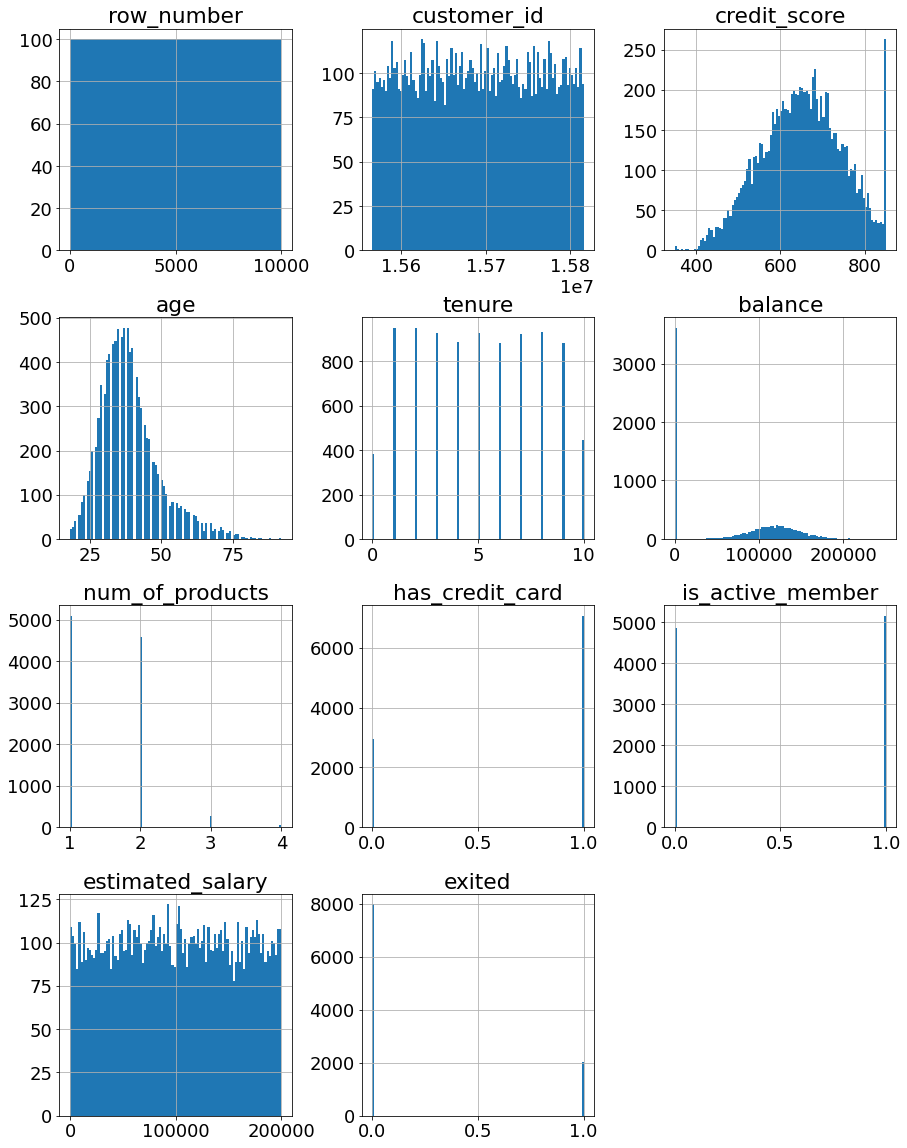

In [10]:
data.hist(bins=100, figsize=(15, 20))
plt.show()

Каждый из признаков дополнительно распределим на численные, категориальные и неинформативные. Последнию категорию уберём, а всё остальное поместим в **prepared_data**:

In [11]:
categorical_features = ['gender', 'has_credit_card',
                        'is_active_member', 'geography']
numeric_features = ['credit_score', 'estimated_salary', 'balance',
                    'num_of_products', 'tenure', 'age']
not_informative = ['row_number', 'customer_id', 'surname']

In [12]:
prepared_data = data.drop(columns=not_informative)

Пропуски, имеющиеся в столбце *tenure* заполним случайными значениями, с распределением как в исходном датафрейме:

In [13]:
random_tenure = ((
    prepared_data.loc[prepared_data['tenure'].notna(), 'tenure'] # из непустых данных столбца tenure
    .sample(prepared_data.shape[0], replace=True, random_state=42)) # выбираем из них 10000 значений
    .reset_index(drop=True)) # сбрасываем индексы
random_tenure

0       1.0
1       6.0
2       6.0
3       3.0
4       9.0
       ... 
9995    5.0
9996    3.0
9997    7.0
9998    8.0
9999    1.0
Name: tenure, Length: 10000, dtype: float64

In [14]:
# заполняем им tenure
prepared_data['tenure'].fillna(value=random_tenure, inplace=True)

Корелляционная матрица:

<AxesSubplot:>

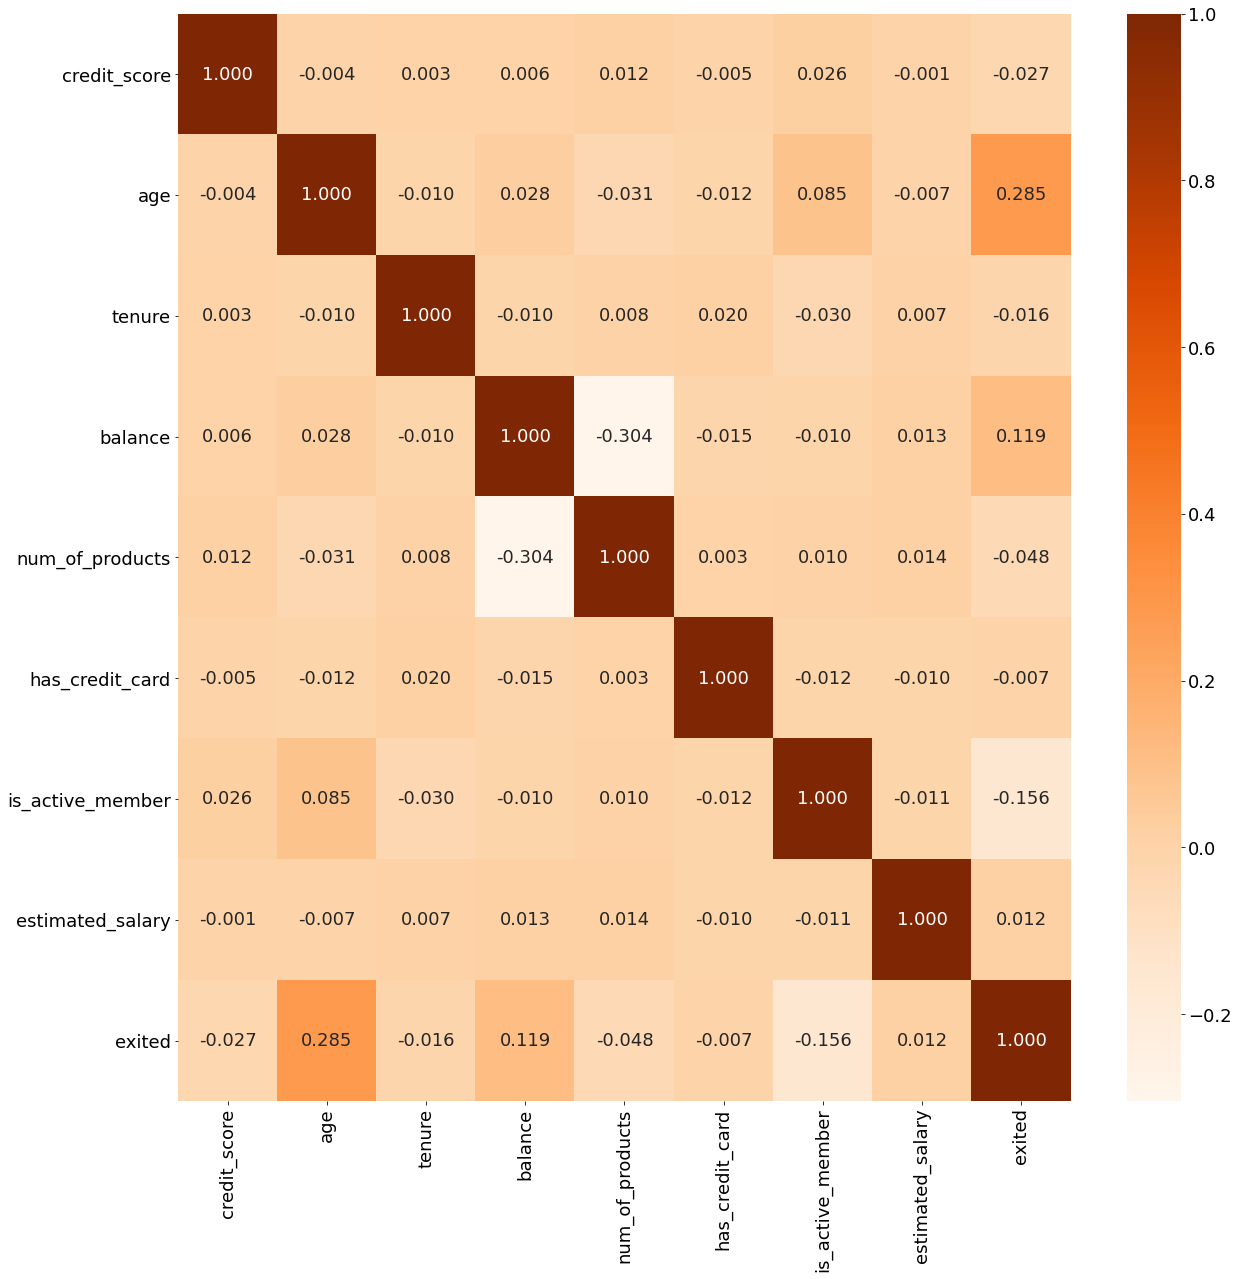

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(prepared_data.corr(), annot=True, fmt='.3f', cmap='Oranges')

**Вывод**:
Датасет с данными клиентов банка загружен и изучен, рассмотрены его основные метрики и рапределения величин по численным и категориальным параметрам, ушедшие и оставшиеся клиенты распределены в соотношении примерно 80/20. Из DataFrame убраны столбцы, не несущей важной информации для моделирования, пропуски в стоблце *tenure* заполнены случайными значениями. 

## Исследование задачи

Для преобразования категориальных данных используем OHE:

In [16]:
# разбиваем категориальные столбцы на булевы столбцы
data_ohe = pd.get_dummies(prepared_data, columns=categorical_features, drop_first=True)
# выделяем признаки
target = data_ohe['exited']
features = data_ohe.drop('exited', axis=1)
seed = 42 # данное значение будет определять псевдослучайные последовательности для моделей

Дальнейшие вычисления будем проводить с помощью функции *data_sampling* со следующими параметрами:
- **stratified** - отвечает за необходимость разбиения данных с сохранением исходного распределения целевого признака;
- **upsampled** - отвечает за необходимость проводения искуственного увеличения выборки. RandomOversampler() искуственно балансирует целевой признак и перемешивает строки.

После формирования выборок, количественные параметры масштабируются с помощью StandardScaler().
Результатом работы функции является 3 пары тренировочных, валидационных и тестовых данных.В рамках этой задачи мы лишены тестовых данных, поэтому имеет смысл разбить всю выборку в соотношении 3:1:1, то есть выделить на обучающие данные 60 % выборки, а на тестовые и валидационные - по 20 %. Валидационные данные необходимы для корректировки параметров модели с целью обеспечения лучших результатов, затем модель будет проверена на тестовых данных.

In [17]:
def data_sampling(stratified: bool, upsampled: bool):
    X_train, X_valid_test, y_train, y_valid_test = \
        train_test_split(features,
                         target,
                         test_size=.4,
                         random_state=seed,
                         stratify=target if stratified else None)
    X_valid, X_test, y_valid, y_test = \
        train_test_split(X_valid_test,
                         y_valid_test,
                         test_size=.5,
                         random_state=seed,
                         stratify=y_valid_test if stratified else None)
    if upsampled: # 
        ros = RandomOverSampler(random_state=seed)
        X_train, y_train = ros.fit_resample(X_train, y_train)
    scaler = StandardScaler()
    X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
    X_valid[numeric_features] = scaler.transform(X_valid[numeric_features])
    X_test[numeric_features] = scaler.transform(X_test[numeric_features])
    # размеры полученных выборок
    df_sizes = pd.DataFrame({
        'features_size': (X_train.shape, X_valid.shape, X_test.shape),
        'target_size': (y_train.size, y_valid.size, y_test.size),
        '0 vs 1, %': (
            (y_train.value_counts(normalize=True)[0],
             y_train.value_counts(normalize=True)[1]),
            (y_valid.value_counts(normalize=True)[0],
             y_valid.value_counts(normalize=True)[1]),
            (y_test.value_counts(normalize=True)[0],
             y_test.value_counts(normalize=True)[1]),
        )
    }, index=['train', 'valid', 'test'])
    display(df_sizes)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

Для подбора гиперпараметров модели будем использовать RandomSearchCV, поэтому предварительно создадим словарь *params* с соответствующими моделям ключами. Каждому ключу соответствует модель, используемая в рамках случайного поиска и набор критериев, комбинации которых будут перебираться в поиске.

In [18]:
params = {
    'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=seed), {
        'criterion': ['gini', 'entropy'], # критерий измерения качества
        'max_depth': range(1, 21), # максимальная глубина дерева  
        'min_samples_leaf': range(1, 6), # минимальное число 'листов' в конченых узлах
        'min_samples_split': range(2, 6) # минимальное число узлов
    }),
    'RandomForestClassifier': (RandomForestClassifier(random_state=seed), {
        'max_depth': range(1, 21),
        'n_estimators': range(50, 101, 10), # число деревьев в 'лесу'
        'criterion': ['gini', 'entropy'],
        'min_samples_leaf': range(1, 6),       
        'min_samples_split': range(2, 6)
    }),
    'LogisticRegression': (
        LogisticRegression(random_state=seed, max_iter=1000), {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': uniform(loc=0, scale=4), # мощность обратной регуляризации
        'fit_intercept': [True, False], # добавление/исключение влияния константы на решение
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # тип решателя
    })
}

Функция show_plots предназначена для отображения графиков ROC-кривой и кривой Precision-Recall. Также для быстрой оценки метрики F1 используется график поверхности уровня. Функция принимает на вход текущую модель и значения её точности и полноты, чтобы отобразить её на PR-кривой.

In [19]:
def show_plots(model, model_precision, model_recall):
    print(model.best_estimator_ if hasattr(model, 'best_estimator_') else '') # модель, для которой строится график
    #
    probabilities_valid = model.predict_proba(features_valid)
    # формируем наборы данных для графиков
    precision, recall, thresholds = precision_recall_curve(
        target_valid, probabilities_valid[:, 1])
    fpr, tpr, thresholds_ = roc_curve(
        target_valid, probabilities_valid[:, 1])
    # создаём область для 2-х графиков
    fig = plt.figure(figsize=(15, 8))
    ax1 = plt.subplot(1, 2, 1)
    
    # строим PR-кривую
    # рассчитываем значения для F1
    x, y = np.mgrid[0:1:100j, 0:1:100j]
    z = np.divide(2 * x * y, x + y)
    # поверхность F1 в координатах Precision-Recall
    plt.contourf(x, y, z, alpha=0.5, levels=np.arange(0, 1.1, 0.1))
    # подписи к линиям уровня
    CS = plt.contour(x, y, z, levels=np.arange(0.1, 1.1, 0.1))
    plt.clabel(CS, colors='k')
    # строим график PR и отмечаем на нём значения текущей модели
    plt.plot(recall, precision, color='blue')
    plt.plot(model_recall, model_precision, 'ro')
    plt.title('Кривая Precision-Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    # строим ROC-кривую
    plt.subplot(122)
    plt.plot(fpr, tpr, [0, 1], [0, 1])
    plt.title('ROC-кривая')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.show()

Функция *model_explorer* предназначена для исследования интересующих нас метрик модели и вывода их на экран. На вход она принимает ключ, по которому извлекаются значения модели и её варьируемых параметров из словаря *params*. Внутри функции RandomizedSearchCV подбирает лучшую функцию по метрике F1, обучает её на тренировочных данных и показывает её основные метрики.

In [20]:
def model_explorer(est):
    model = RandomizedSearchCV(
        estimator=params[est][0], # выбор модели
        param_distributions=params[est][1], # варьируемые параметры
        random_state=seed,
        n_jobs=-1, # использовать все ядра для расчёта
        scoring='f1', # лучшая модель выбирается по метрике F1
        n_iter=20) # 20 комбинаций параметров
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    # площадь под ROC-кривой
    auc_roc = roc_auc_score(
        target_valid, model.predict_proba(features_valid)[:, 1])
    precision = precision_score(target_valid, predictions)
    recall = recall_score(target_valid, predictions)
    F1 = f1_score(target_valid, predictions)
    # выводим графики для этой модели и показываем метрики
    show_plots(model, precision, recall)
    print(f'Метрики: {precision=:.4f}, {recall=:.4f}, {auc_roc=:.4f}, {F1=:.4f}')
    print()
    return precision, recall, auc_roc, F1

Теперь, когда все функции для исследования моделей и метрик определены, пришло время для изучения результатов для 4 различных вариантов балансировки, первым рассмотрим случай для исходного набора данных, где данные не расширяются и баланс в их разделении не обязателен. Наборы метрик модели будем собирать в списки metrics_, где после _ будет стоять сокращение от текущего значения параметров stratify И upsampled.

In [21]:
metrics_FF = []
(features_train, target_train,
 features_valid, target_valid,
 features_test, target_test) = data_sampling(
    stratified=False, upsampled=False)

,features_size,target_size,"0 vs 1, %"
train,"(6000, 11)",6000,"(0.7955, 0.2045)"
valid,"(2000, 11)",2000,"(0.81, 0.19)"
test,"(2000, 11)",2000,"(0.785, 0.215)"


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=4, random_state=42)


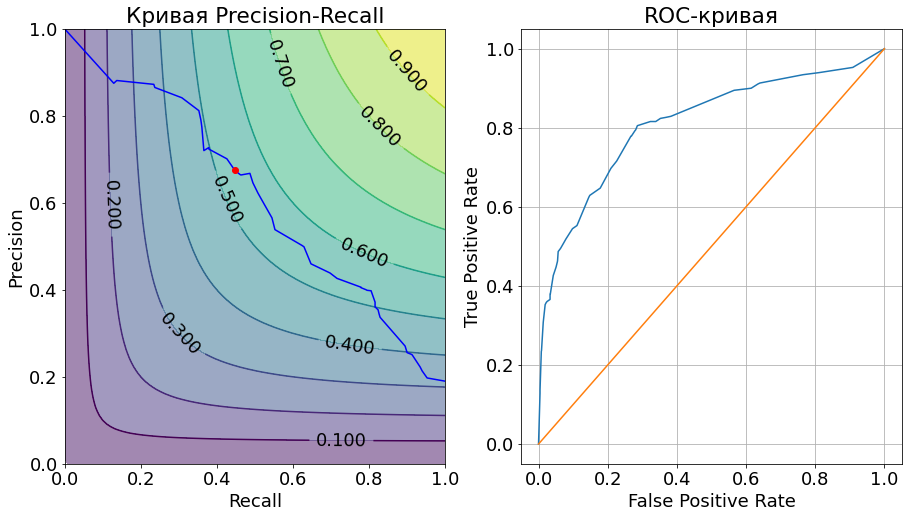

Метрики: precision=0.6746, recall=0.4474, auc_roc=0.8112, F1=0.5380



In [22]:
metrics_FF.append(model_explorer('DecisionTreeClassifier'))

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=80, random_state=42)


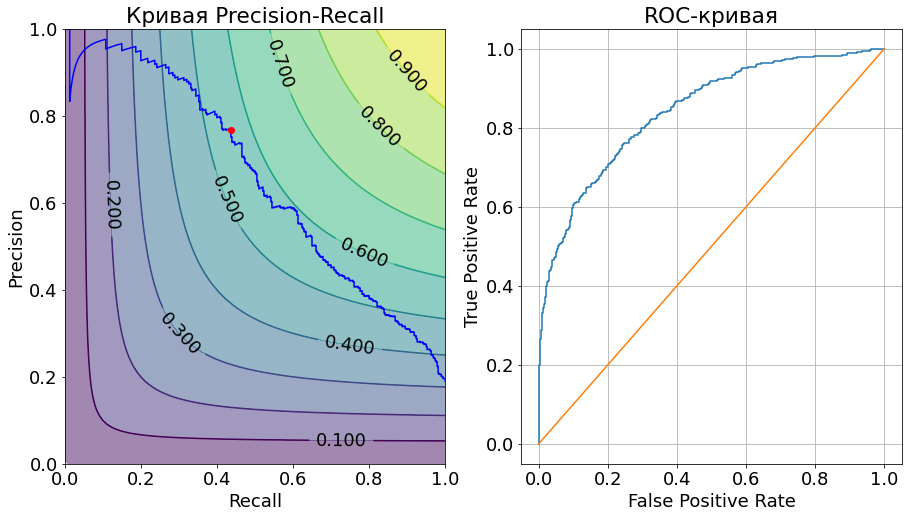

Метрики: precision=0.7685, recall=0.4368, auc_roc=0.8427, F1=0.5570



In [23]:
# выполняется за 30 с
metrics_FF.append(model_explorer('RandomForestClassifier'))

LogisticRegression(C=0.06386500888085678, fit_intercept=False, max_iter=1000,
                   penalty='none', random_state=42, solver='sag')


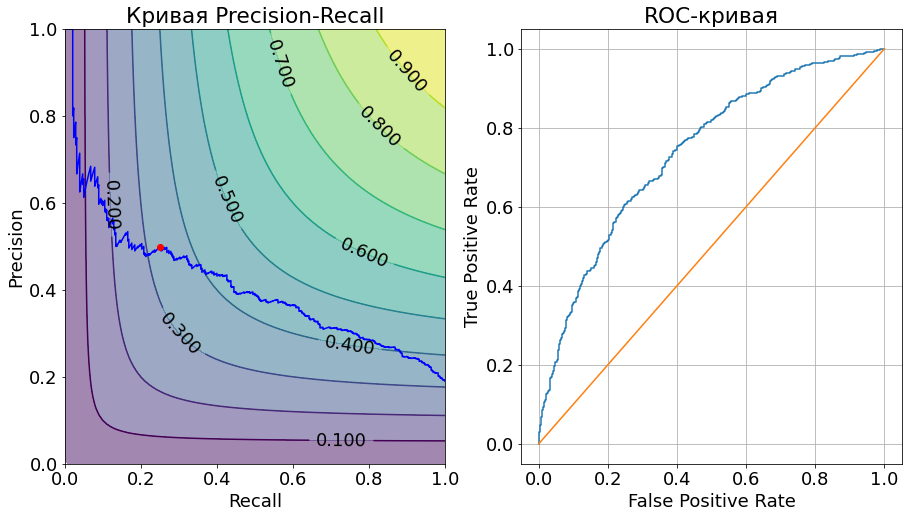

Метрики: precision=0.4974, recall=0.2500, auc_roc=0.7384, F1=0.3327



In [24]:
metrics_FF.append(model_explorer('LogisticRegression'))

**Вывод**:
Обработку данных и параметров модели выполняют функции **data_sampling** - подготовка тренировочной, валидационной и тестовой выборок, **show_plots** - вывод PR и ROC-кривых и **model_explorer** - поиск лучшей модели по значению F1 и вывод её основных метрик.
Результаты их использования следующие:

- ***DecisionTree***: хорошая модель с неплохими параметрами auc_roc(0.8112) и точности(0.6746), но значение F1 = 0.538 не превышает порогового из-за низкой полноты < 0.45;
- ***RandomForest***: наибольшие значения auc_roc и F1 - 0.843 и 0.557, благодаря высокому значению точности = 0.7685;
- ***LogisticRegression***: самый низкий показатель F1 среди всех моделей - 0.3327, поскольку покаатели точности и полноты малы - 0.5 и 0.25 соответственно, значение auc_roc тоже невелико.

Случайный лес показал лучшие результаты, но тем не менее, ни одной из моделей не удалось достичь, параметра F1 больше 0.59, поэтому они не подходят в качестве валидных моделей, значит данные для них придётся улучшать различными способами: изменением параметра stratified и upsampled.

## Борьба с дисбалансом

Параметр *stratified* позволяет в во всех генерируемых выборках сохранять такой же баланс ответов целевого признака, как и в исходных данных, а параметр *upsampled* отвечает за необходимость искуственного увеличения данных более редкого параметра. Также стоит отметить, что альтернативой этим методам выступает установка параметра class_weight в рассматриваемых моделях, но в этой работе он рассматриваться не будет.

### Stratified = *False*, Upsampled = *True*

Увеличим выборку таким образом, что более редкий класс(1) будет встречаться в обучающей выборке так же часто как и 0:

In [25]:
metrics_FT = []
(features_train, target_train,
 features_valid,target_valid,
 features_test, target_test) = data_sampling(
    stratified=False, upsampled=True)

,features_size,target_size,"0 vs 1, %"
train,"(9546, 11)",9546,"(0.5, 0.5)"
valid,"(2000, 11)",2000,"(0.81, 0.19)"
test,"(2000, 11)",2000,"(0.785, 0.215)"


Выведем модели и достигаемые ими метрики:

DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)


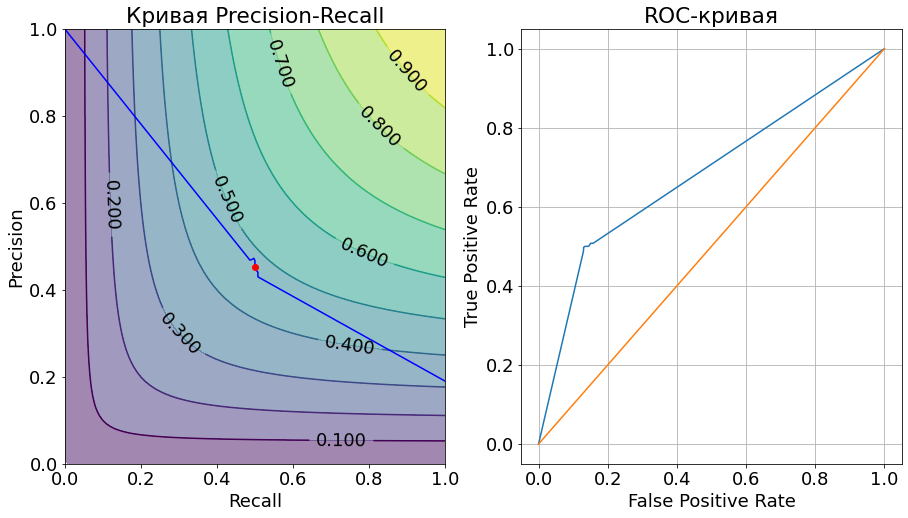

Метрики: precision=0.4524, recall=0.5000, auc_roc=0.6806, F1=0.4750



In [26]:
metrics_FT.append(model_explorer('DecisionTreeClassifier'))

RandomForestClassifier(max_depth=15, random_state=42)


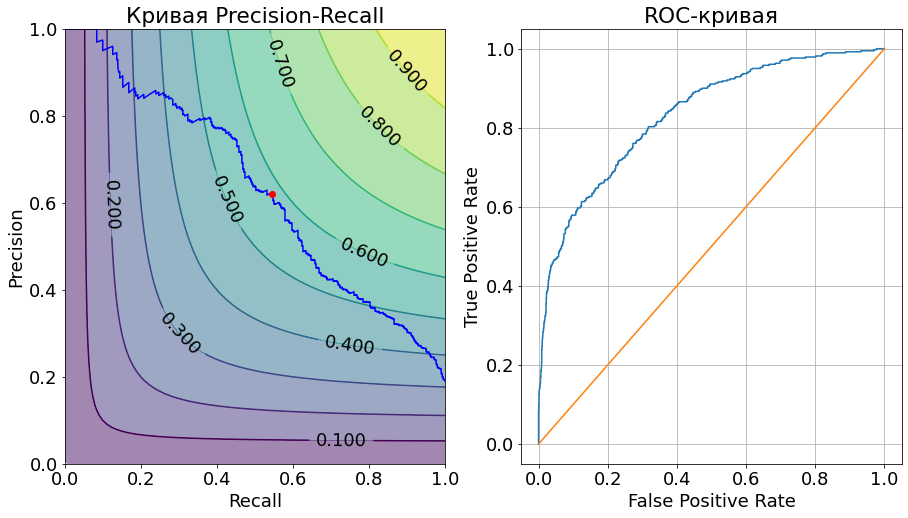

Метрики: precision=0.6198, recall=0.5447, auc_roc=0.8331, F1=0.5798



In [27]:
# выполняется примерно 40 с
metrics_FT.append(model_explorer('RandomForestClassifier'))

LogisticRegression(C=0.7394178221021082, max_iter=1000, random_state=42)


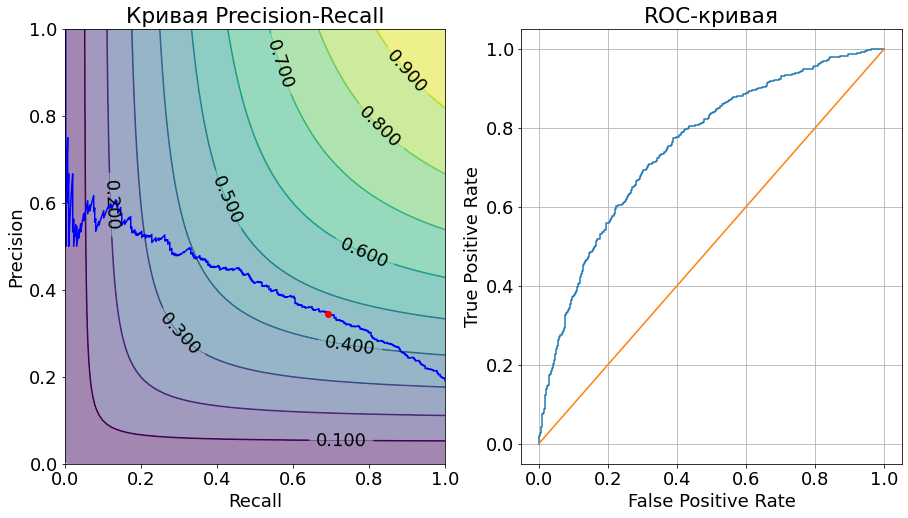

Метрики: precision=0.3442, recall=0.6921, auc_roc=0.7528, F1=0.4598



In [28]:
metrics_FT.append(model_explorer('LogisticRegression'))

**Вывод**: у всех моделей F1 < 0.59, лучше всего показатели у случайного леса, точность и полнота плохо сбалансирована у логистической регрессии, у дерева решений чуть лучше, но значения auc_roc и F1 всё равно низкие. Продолжаем улучшать модели.

### Stratified = *True*, Upsampled = *False*

In [29]:
metrics_TF = []
(features_train, target_train,
 features_valid,target_valid,
 features_test, target_test) = data_sampling(
    stratified=True, upsampled=False)

,features_size,target_size,"0 vs 1, %"
train,"(6000, 11)",6000,"(0.7963333333333333, 0.20366666666666666)"
valid,"(2000, 11)",2000,"(0.796, 0.204)"
test,"(2000, 11)",2000,"(0.7965, 0.2035)"


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=3, random_state=42)


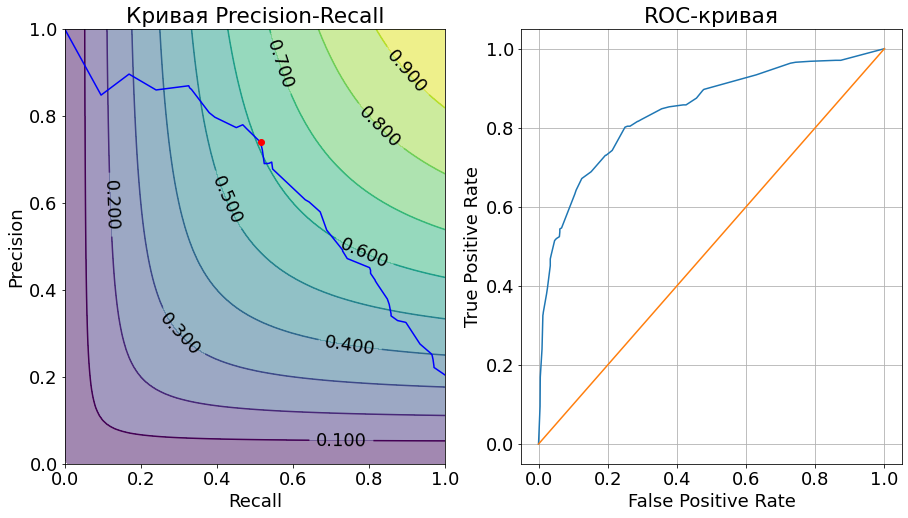

Метрики: precision=0.7394, recall=0.5147, auc_roc=0.8436, F1=0.6069



In [30]:
metrics_TF.append(model_explorer('DecisionTreeClassifier'))

RandomForestClassifier(max_depth=15, random_state=42)


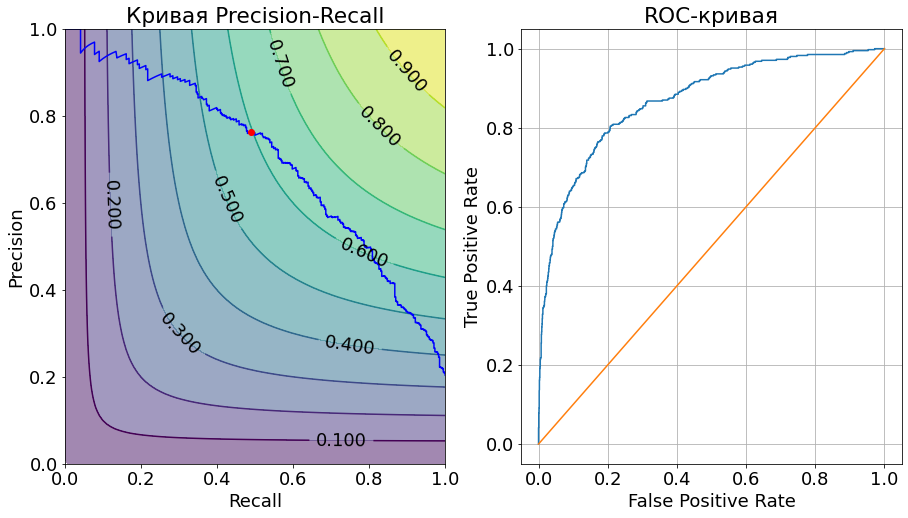

Метрики: precision=0.7634, recall=0.4902, auc_roc=0.8697, F1=0.5970



In [31]:
# выполняется примерно 30 с
metrics_TF.append(model_explorer('RandomForestClassifier'))

LogisticRegression(C=1.7006234979649788, fit_intercept=False, max_iter=1000,
                   random_state=42, solver='sag')


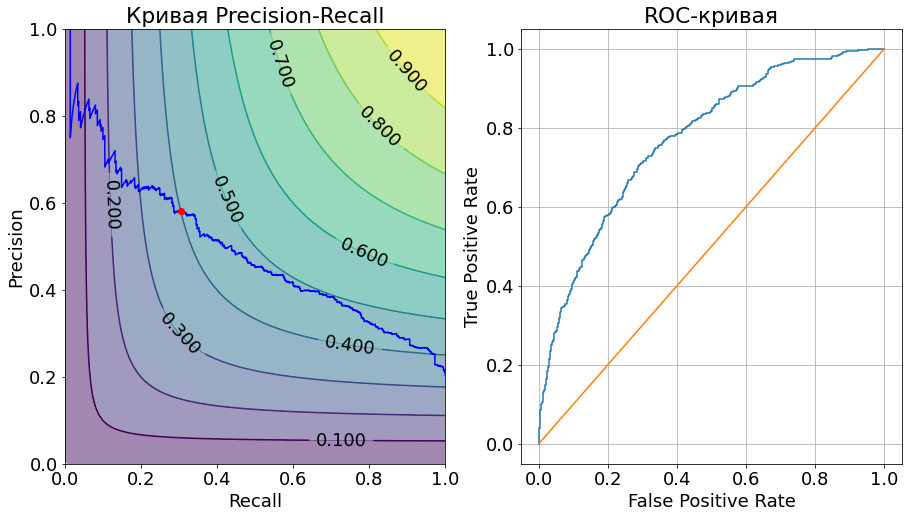

Метрики: precision=0.5814, recall=0.3064, auc_roc=0.7732, F1=0.4013



In [32]:
metrics_TF.append(model_explorer('LogisticRegression'))

**Вывод**: сохранение баланса в выборках позволило значительно улучшить результаты дерева решений и немного закрепило случайный лес(значение на грани допустимого). Логистическая регрессия, как видно из графика, не способна дать удовлетворительный результат.

### Stratified = *True*, Upsampled = *True*

In [33]:
metrics_TT = []
(features_train, target_train,
 features_valid,target_valid,
 features_test, target_test) = data_sampling(
    stratified=True, upsampled=True)

,features_size,target_size,"0 vs 1, %"
train,"(9556, 11)",9556,"(0.5, 0.5)"
valid,"(2000, 11)",2000,"(0.796, 0.204)"
test,"(2000, 11)",2000,"(0.7965, 0.2035)"


DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)


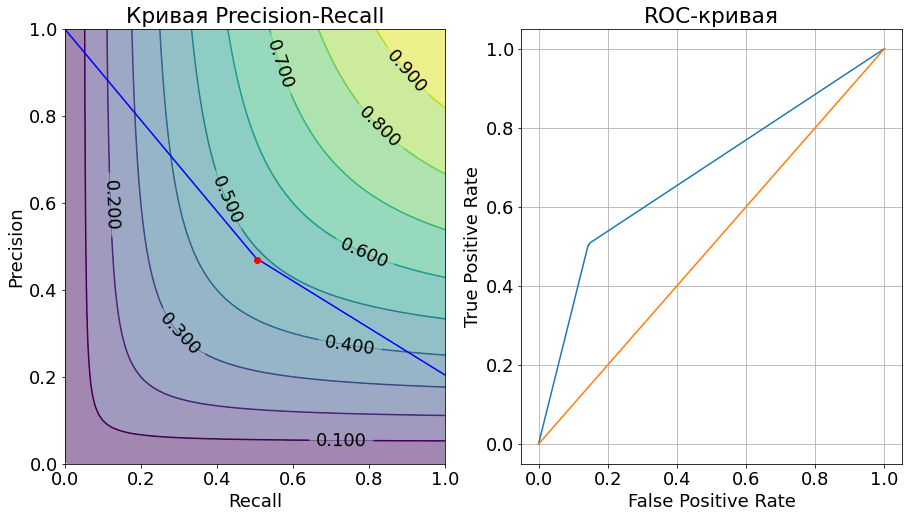

Метрики: precision=0.4692, recall=0.5049, auc_roc=0.6809, F1=0.4864



In [34]:
metrics_TT.append(model_explorer('DecisionTreeClassifier'))

RandomForestClassifier(max_depth=15, random_state=42)


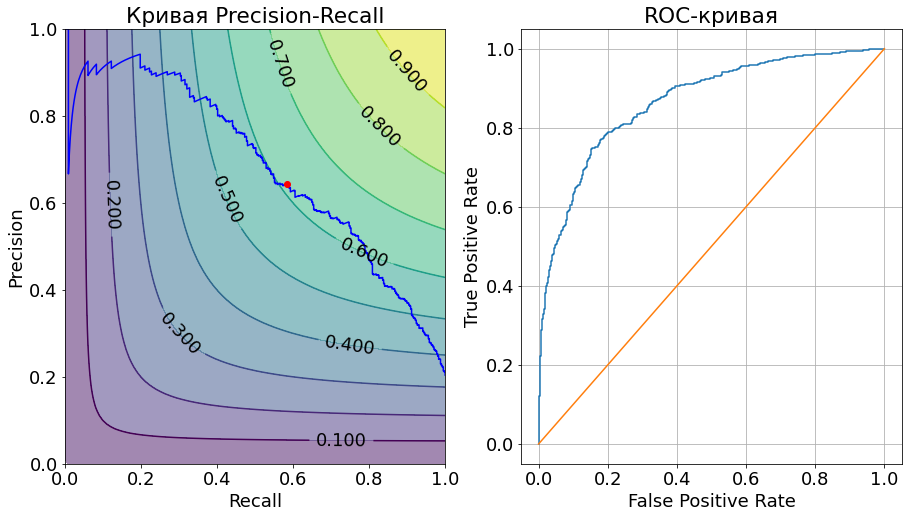

Метрики: precision=0.6432, recall=0.5833, auc_roc=0.8658, F1=0.6118



In [35]:
# выполняется за 40 с
metrics_TT.append(model_explorer('RandomForestClassifier'))

LogisticRegression(C=2.4466126419531236, max_iter=1000, penalty='none',
                   random_state=42, solver='newton-cg')


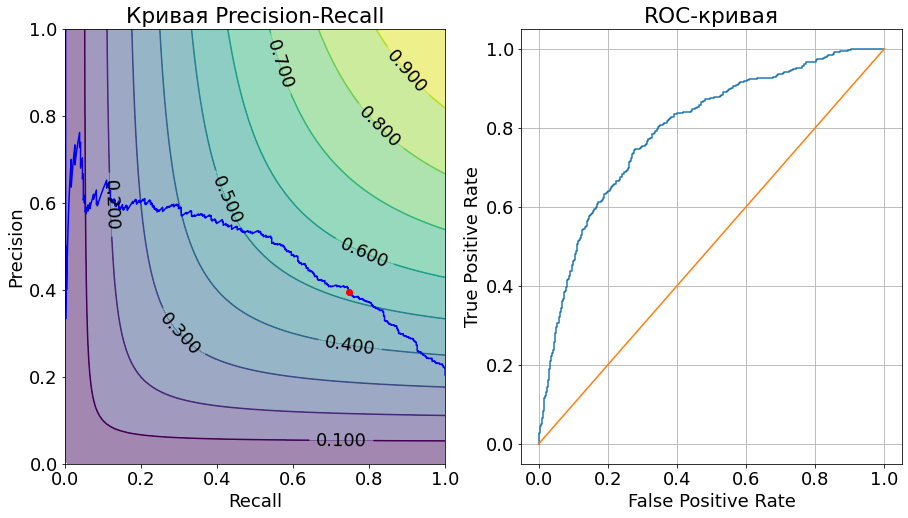

Метрики: precision=0.3946, recall=0.7475, auc_roc=0.7934, F1=0.5165



In [36]:
metrics_TT.append(model_explorer('LogisticRegression'))

**Вывод**:
- Точность дерева решений значительно упала, что привело также к падению F1 И auc_roc;
- Случайный лес показал лучший F1(0.6118) и auc_roc(0.8658) среди всех представленных комбинаций;
- Логистическая регрессия улучшила свои показатели, но из-за низкой точности не смогла преодолеть порог.

### Подведение итогов

Поскольку в собранных данных нас больше всего всего интересует параметр модели F1, то все эти значения соберём в один датафрейм, где столбцами будут выступать названия моделей, а индексами - комбинации флагов для функции data_sampling().

In [37]:
# TF = stratify - True, upsampling - False
flags = metrics_FF, metrics_FT, metrics_TF, metrics_TT
models_F1 = pd.DataFrame({
    'DecisionTreeClassifier': [x[0][-1] for x in flags],
    'RandomForestClassifier': [x[1][-1] for x in flags],
    'LogisticRegression': [x[2][-1] for x in flags]
}, index=['FF', 'FT', 'TF', 'TT'])
models_F1

,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
FF,0.537975,0.557047,0.332750
FT,0.475000,0.579832,0.459790
TF,0.606936,0.597015,0.401284
TT,0.486423,0.611825,0.516511


Визуально отделим модели, проходящие порог в 0.59:

<AxesSubplot:>

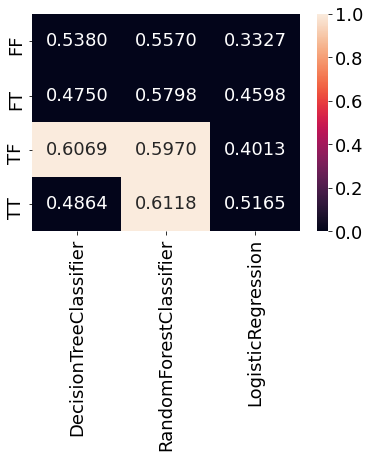

In [38]:
sns.heatmap(models_F1 > 0.59, annot=models_F1, fmt='.4f')

**Вывод**:
Большее влияние оказывает наличие установленного параметра stratify на этапе разделения выборок. Среди всех вариантов только 25 % можно признать пригодными.
- Эффективные модели: случайный лес, дерево решений(stratify only)
- Эффективные варианты обработки данных: ислпользование stratify или stratify + upsample

Для тестовой проверки выбираем модель случайного леса на данных, обработанных методами stratify + upsample

## Тестирование модели

Обучим лучшую модель и проверим её на тестовых данных. Точность, полноту и F1 найдём функцией classification_report, auc_roc посчитаем отдельно. Значение полученное путём f1_score равносильно значению f1-score в строке 1.

In [39]:
model = RandomForestClassifier(max_depth=15, random_state=seed)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
auc_roc = roc_auc_score(target_test, model.predict_proba(features_test)[:, 1])

In [40]:
print(classification_report(target_test, model.predict(features_test), digits=4))
print('Значение auc_roc составило', auc_roc)

              precision    recall  f1-score   support

           0     0.8915    0.9234    0.9072      1593
           1     0.6514    0.5602    0.6024       407

    accuracy                         0.8495      2000
   macro avg     0.7715    0.7418    0.7548      2000
weighted avg     0.8427    0.8495    0.8452      2000

Значение auc_roc составило 0.8479257377562462


Значение метрики на тестовых данных удовлетворительное и превышает пороговое. Теперь сравним значения со случайной моделью.

In [41]:
clf_dummy = DummyClassifier(random_state=seed, strategy='most_frequent')
clf_dummy.fit(features_train, target_train)
predictions = clf_dummy.predict(features_test)
auc_roc = roc_auc_score(
    target_test, clf_dummy.predict_proba(features_test)[:, 1])
print(classification_report(
    target_test, clf_dummy.predict(features_test), digits=4))
print('Значение auc_roc составило %.4f' % (auc_roc))

              precision    recall  f1-score   support

           0     0.7965    1.0000    0.8867      1593
           1     0.0000    0.0000    0.0000       407

    accuracy                         0.7965      2000
   macro avg     0.3982    0.5000    0.4434      2000
weighted avg     0.6344    0.7965    0.7063      2000

Значение auc_roc составило 0.5000


Значение accuracy модели случайного леса больше, чем у baseline модели, поэтому модель можно считать адекватной.

**Вывод**: исследованная на тестовой выборке модель случайного леса показала хорошие метрики и преодолела пороговую отметку F1 в 0.59. Модель можно считать адекватной, поскольку случайная модель обладает более низкими значениями метрик.

## Выводы
По набору данных о клиентах банка решалась задача бинарной классификации - предсказание ухода клиента в обозримом будущем. По итогам работы можно заключить следующее:
- Данные клиентов были изучены, столбцы приведены к стандартному виду и распределены на группы по типу данных, заполнены пропуски в столбце tenure;
- Категориальные признаки были преобразованы методом OHE, численные - отмасштабированы StandardScaler'ом, данные разделены на features и target;
- Созданы функции для разбиения выборок, вывода PR и ROC-кривых, подбора гиперпараметров и исследования важных метрик модели дерева решений, случайного леса и логистической регрессии.
- Борьба с дисбалансом рассмотрена в 4 возможных вариантах: с/без использованием параметра **stratify** при формировании выборок(сохраняется ли баланс классов в выборках или нет) и с/без использования функции **RandomOverSampler**(искуственное увеличение выборки) и их комбинации;
- Распределение значений в классах целевого признака и способы обработки и разделения исходных данных оказывает весомое влияние на конечный результат и качество модели.
- Лучшие результаты показала стратегия с использованием **stratify**, поскольку в этом случае показатели f1 выше порогового были у дерева решений и случайного леса, **stratify + upsample** оказался хорош только для случайного леса, и значительно понизил метрику дерева;
- Логистическая регрессия не дала удовлетворительных результатов нив одном из вариантов, для текущей задачи классификации она не подходит;
- Лучшей моделью для данной задачи является случайный лес, с максимальной глубиной в 15. Модель показала свою адекватность в сравнении со случайной моделью и F1 = 0.6024 на тестовых данных.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*